程式版本


---


使用 Simple Transformers 框架  

---



Simple Transformers 是一個 Python 的 NLP 套件/框架，旨在減少使用 Transformer 模型時的複雜步驟。能夠讓使用者透過短短幾行的程式碼，快速實現一個 NLP 任務的深度學習模型訓練環境。

而它的簡化工作，顧名思義，當然是基於 Hugging Face 團隊和他們的 Transformers 套件。

安裝 simpletransformers

In [ ]:
!pip install simpletransformers

In [2]:
import pandas as pd

In [3]:
def Convert(data_p):
     data_p = data_p[data_p['sentiment'].isin(['positive', 'negative'])]
     data_p['sentiment'] = data_p['sentiment'].replace({'positive':1, 'negative': 0})
     return data_p

In [4]:
s_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB_Dataset.csv')

將資料集 IMDB_Dataset.csv 的 'positive' 改為'1', 'negative'改為 '0'

In [5]:
s_df = Convert(s_df)

查看資料狀況(正面1,負面0)

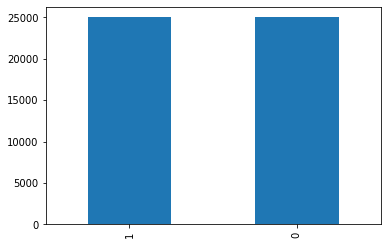

In [6]:
s_df['sentiment'].value_counts().plot(kind='bar')

詳細資料集狀況

Simple Transformers要求資料必須包含在至少兩列的Pandas DataFrames中。


---


只需為列的文字和標籤命名，SimpleTransformers就會處理資料。


---



第一列包含文字，型別為str。 第二列包含標籤，型別為int。



In [7]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
s_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [9]:
from sklearn.model_selection import train_test_split

將資料集拆分為



---


訓練集train_df 及 測試集test_df 

In [10]:
train_df, test_df = train_test_split(s_df, test_size = 0.2, random_state = 1027)

導入模組(導入想要使用的模型，使用BERT模型的實現套件simpletransformers）

In [11]:
from simpletransformers.classification import ClassificationModel

創建模組

In [12]:
model = ClassificationModel('bert', 'bert-base-uncased',num_labels=None, weight=None) 
# model = ClassificationModel("bert","bert-base-uncased") 

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

訓練模組


---
由於GPU資源限制,Epoch採預設值1


In [13]:
model.train_model(train_df, args = {'overwrite_output_dir': True})

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/40000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/5000 [00:00<?, ?it/s]

(5000, 0.3673441009521484)

選擇一組好的超參數( hyperparameter)值在開發最先進的模型中起著巨大的作用。


---


Simple Transformers 原生支持出色的 **W&B Sweeps**(https://docs.wandb.ai/guides/sweeps) 功能，以實現自動超參數優化。

---
本次模組相關參數,只採用預設值


訓練完成後,測試資料集(test_df)放進去測試

In [14]:
result, model_output, wrong_predictions = model.eval_model(test_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/10000 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1250 [00:00<?, ?it/s]

測試結果

In [15]:
result

{'mcc': 0.7655034223410263,
 'tp': 4502,
 'tn': 4323,
 'fp': 678,
 'fn': 497,
 'auroc': 0.9551491182059647,
 'auprc': 0.9534837785696679,
 'eval_loss': 0.3237473171234131}

整體預測準確率 (tp+tn)/tp+fp+fn+tn) 


In [16]:
(4502+4323)/(4502+678+497+4323)

0.8825